%%html
<style>
    .exercise {
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        padding: 10px;
        display: block;
        border-radius: 20px;
        background-color: #AFEEEE;
    }
</style>

<center style="font-size:25px;padding-bottom:10px;"><b>Métodos Avanzados en Estadística</b></center>
<center style="font-size:22px;padding-bottom:10px;"><b>Entrega 4: Clasificación</b></center>
<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<div class="exercise">
<h1> Ejercicio 4</h1> <a href='#Ejercicio-4' class='anchor-link'>¶</a>

Sea $(X,Y) ∈ \mathbb R^2$ un vector aleatorio tal que la distribución de $Y$ condicionada a $X$ es de Bernoulli de parámetro $(1 + e^{−\beta X})^{−1}$, donde $\beta \in \mathbb R$, y $\mathbb P[Y = 0] = \mathbb P[Y = 1] = 1/2$. <br>

Supongamos que queremos predecir $Y$ a partir de $X$. Responde a las siguientes preguntas, dejando el resultado en función del parámetro $\beta$. <br>

<b>a)</b> Determina la regla de clasificación óptima en este modelo. <br>

    
<b>b)</b> Si $X$ tiene distribución uniforme en $(0, 1)$, calcula el error de la regla de clasificación del apartado anterior (error Bayes). <br>

<b>c)</b> Si $X$ tiene distribución uniforme en $(0, 1)$, calcula $\lim_{n \rightarrow \infty} \mathbb [L_n]$, donde $L_n$ es la probabilidad de error correspondiente al clasificador del vecino m´ás próximo. Compara el resultado con el del apartado anterior.
</div>

### Solución a)

En primer lugar, sean $f_Y(y), f_X(x), f_{X|Y}(x|y)$ y $f_{X|Y}(x|y)$ las funciones de densidad de $Y$, $X$ y las respectivas condicionadas. Por hipótesis sabemos que $Y|X$ sigue una Bernuilli de parámetro $(1 + e^{−\beta X})^{−1}$:

$$
    f_{Y|X}(y|x) = p(x)^k \; (1-p(x))^{1-k}
$$

donde $p(x) = (1 + e^{−\beta X})^{−1}$ es la probabilidad de que $Y$ tome el valor $1$ y $k \in \{0,1\}$ son los posibles valores de la $X$. Utilizando el teorema de Bayes obtenemos la distribución de $X|Y$:

$$
    f_{X|Y}(x|y) = \frac{f_{Y|X}(y|x) \; f_X(x)}{f_Y(y)} = \frac{f_X(x)}{f_Y(k)} p(x)^k \; (1-p(x))^{1-k}
$$

Sabiendo que $\mathbb P[Y = y] = f_Y(y) = \pi_i = 1/2$ para $y \in \{0,1\}$ por hipótesis obtenemos las distribuciones marginales:

$$
    f_0(x) = f_{X|Y=0}(x|y=0) = 2 f_X(x) \; (1-p(x)) = 2 f_X(x) \left( 1- \frac{1}{1 + e^{−\beta x}} \right)\\
    f_1(x) = f_{X|Y=1}(x|y=1) = 2 f_X(x) \; p(x) = 2 f_X(x) \frac{1}{1 + e^{−\beta x}}
$$

Una vez obtenidas las distribuciones marginales, calculamos $\eta(x)$. Para ello 

$$
\begin{align*}
    \eta(x) & = \mathbb E[Y=1 | X] = \mathbb P[Y=1 | X] = \frac{\pi_1 f_1(x)}{\pi_0 f_0(x) + \pi_1 f_1(x)} \\
    & = \frac{ 2 f_X(x) \frac{1}{1 + e^{−\beta x} } }{ 2 f_X(x) \left( 1 - \frac{1}{1 + e^{−\beta x}}\right) + 2 f_X(x) \frac{1}{1 + e^{−\beta x}}} \\
    & = \frac{1}{1 + e^{−\beta x}}
\end{align*}
$$

Finalmente, calculamos la regla óptima a partir de $\eta(x)$. Sabemos que asigna $1$ a $x$ si y sólo si

$$
\begin{align*}
    \eta(x) > \frac{1}{2} & \leftrightarrow \frac{1}{1 + e^{−\beta x}} > \frac{1}{2} \\
    & \leftrightarrow 1 > e^{−\beta x} \\
    & \leftrightarrow 1 < e^{\beta x} \\
    & \leftrightarrow 0 < \beta x.
\end{align*}
$$

Por lo tanto, la regla óptima es la siguiente:

$$
g^*(x) =
\begin{cases}
    1 \quad \text{si } \beta x > 0 \\
    0 \quad \text{si } \beta x \le 0 \\
\end{cases}
$$

Nos podríamos haber dado cuenta de que esta era la regla ótima de forma mucho más directa: estamos clasificando $1$ si la función logística es mayor que \frac{1}{2}, lo que es esencialmente a regresión logística:

$$
g^*(x) =
\begin{cases}
    1 \quad \text{si } \eta(x) > \frac{1}{2} \\
    0 \quad \text{si } \eta(x) \le \frac{1}{2} \\
\end{cases}
$$

Como comprobación adicional podemos computar esta regla a partir de las distribuciones marginales. Puesto que son equivalentes, hemos de obtener el mismo resultado. Sabemos que la regla óptima asigna $1$ a $x$ si y sólo si

$$
\begin{align*}
    \frac{\pi_1 f_1(x)}{\pi_0 f_0(x)} > 1 & \leftrightarrow \frac{ 2 f_X(x) \frac{1}{1 + e^{−\beta x} } }{ 2 f_X(x) \left( 1 - \frac{1}{1 + e^{−\beta x}}\right)} > 1 \\
    & \leftrightarrow \frac{ 1 }{1 + e^{−\beta x} - 1} > 1 \\
    & \leftrightarrow e^{\beta x} > 1 \\
    & \leftrightarrow \beta x > 0,
\end{align*}
$$

como esperábamos.

### Solución b)

Puesto que la variable $X \sim U(0,1):$

$$
    f_X(x) = \begin{cases}
        1 \quad & \text{si } x \in [0,1] \\
        0 \quad & \text{en otro caso}
    \end{cases}
$$

Calculemos el error Bayes:

$$
\begin{align*}
    L^* & = \frac{1}{2} - \frac{1}{2} \mathbb E\left[ \left|2\eta(x) - 1\right| \right] \\
    & = \frac{1}{2} - \frac{1}{2} \int_{x \in \mathbb R} \left| \; 2 \frac{1}{1 + e^{−\beta x}} - 1 \right| f_X(x) \text dx \\
    & = \frac{1}{2} - \frac{1}{2} \int_{x \in \mathbb R} \left| \frac{1 - e^{−\beta x}}{1 + e^{−\beta x}} \right| f_X(x) \text dx \\
    & = \frac{1}{2} - \frac{1}{2} \int_0^1 \left| \frac{1 - e^{−\beta x}}{1 + e^{−\beta x}} \right| \text dx
\end{align*}
$$

Para dar una descripción más específica del error Bayes hemos de distinguir casos según el valor absoluto. Veamos cuando el interior toma valor positivo:

$$
\begin{align*}
    \frac{1 - e^{−\beta}}{1 + e^{−\beta}} > 0 & \leftrightarrow 1 - e^{−\beta} > 0 \\
    & \leftrightarrow e^{−\beta} < 1 \\
    & \leftrightarrow −\beta < 0 \\
    & \leftrightarrow \beta > 0 \\
\end{align*}
$$

Calculemos por separado la integral centrándonos en el caso positivo ($\beta > 0$):

$$
\begin{align*}
    \int_{x \in \mathbb R}\frac{1 - e^{−\beta x}}{1 + e^{−\beta x}} f_X(x) \text dx
    & = \int_0^1 \frac{1}{1 + e^{−\beta x}} \text dx - \int_0^1 \frac{e^{−\beta x}}{1 + e^{−\beta x}} \text dx \\
    & \stackrel{(*)}{=} \int_1^{e^{−\beta}} \frac{1}{1 + u} \frac{\text du}{-\beta u} - \frac{1}{-\beta} \int_0^1 \frac{-\beta e^{−\beta x}}{1 + e^{−\beta x}} \text dx \\
    & = \frac{1}{-\beta} \int_1^{e^{−\beta}} \left(\frac{1}{u} - \frac{1}{1 + u} \right)\text du - \frac{1}{-\beta} \left( \log\left(1 + e^{−\beta x}\right) \right]^1_0 \text dx \\
    & = \frac{1}{-\beta} \left(\log u - \log(1+u)\right]_1^{e^{−\beta}} - \frac{1}{-\beta} \left( \log\left(1 + e^{−\beta x}\right) \right]^1_0 \text dx \\
    & = \frac{1}{-\beta} \left(\log e^{−\beta x} - \log(1+e^{−\beta x})\right]_0^1 - \frac{1}{-\beta} \left( \log\left(1 + e^{−\beta x}\right) \right]^1_0 \text dx \\
    & = \frac{1}{-\beta} \left(−\beta x - 2 \log(1+e^{−\beta x})\right]_0^1 \\
    & = 1 + \frac{2}{\beta} \left( \log(1+e^{−\beta}) - \log 2)\right) \\
    & = 1 + \frac{2}{\beta} \log \frac{1+e^{−\beta}}{2} \\
\end{align*}
$$

Donde en $(*)$ hemos aplicado el cambio de variable $u=e^{-\beta x}, \text du = -\beta e^{-\beta x} \text dx$. Adicionalmente, en $(*)$ hemos asumido que $\beta \neq 0$ pues dividimos por dihco valor. Es sencillo darse cuenta de que si sustitumos $\beta=0$ en la expresión inicial de $L^*$ obtenemos $L^* = \frac{1}{2}$.

Finalmente podemos obtener una expresión reducida para el error Bayes distinguiendo casos:

$$
L^* = \frac{1}{2} - \frac{1}{2} \int_0^1 \left| \frac{1 - e^{−\beta x}}{1 + e^{−\beta x}} \right| \text dx = 
\begin{cases}
    \frac{1}{2} - \frac{1}{2} \left( 1 + \frac{2}{\beta} \log \frac{1+e^{−\beta}}{2} \right) = - \frac{1}{\beta} \log \frac{1+e^{−\beta}}{2} \quad & \text{si } \beta > 0 \\
        \frac{1}{2}  \quad & \beta = 0 \\
    \frac{1}{2} + \frac{1}{2} \left( 1 + \frac{2}{\beta} \log \frac{1+e^{−\beta}}{2} \right) = 1 + \frac{1}{\beta} \log \frac{1+e^{−\beta}}{2} \quad & \text{si } \beta < 0 \\
\end{cases}
$$

Podemos visualizar este error utilizando [Geogebra](https://www.geogebra.org/graphing/vebjrwmy):

![figures/4_2](figures/4_2.PNG)

Finalmente, realicemos una rápida comprobación de que nuestros cálculos son correctos computando el error Bayes basándonos unicamente en las distribuciones marginales:

$$
\begin{align*}
    L^* & = \frac{1}{2} - \frac{1}{4} \int_{x \in \mathbb R} \left|f_0(x) - f_1(x) \right| \text dx\\
    & = \frac{1}{2} - \frac{1}{4} \int_{x \in \mathbb R} \left| \; 2 f_X(x) \left( 1 - \frac{1}{1 + e^{-\beta x}} \right) - 2 f_X(x) \frac{1}{1 + e^{-\beta x}} \right| \text dx \\
    & = \frac{1}{2} - \frac{1}{4} \int_{x \in \mathbb R} 2 f_X(x) \left| 1 - \frac{1}{1 + e^{-\beta x}} - \frac{1}{1 + e^{-\beta x}} \right| \text dx \\
    & = \frac{1}{2} - \frac{1}{2} \int_{x \in \mathbb R} f_X(x) \left| 1 - \frac{2}{1 + e^{-\beta x}}\right| \text dx \\
    & = \frac{1}{2} - \frac{1}{2} \int_0^1 \left| \frac{-1 + e^{-\beta}}{1 + e^{-\beta}}\right| \text dx \\
    & = \frac{1}{2} - \frac{1}{2} \int_0^1 \left| \frac{1 - e^{-\beta}}{1 + e^{-\beta}}\right| \text dx, \\
\end{align*}
$$

que coincide con el primer valor computado para $L^*$ al principio del apartado.


### Solución c)

Sea $(X_{(1)}, Y_{(1)})$ el vecino más próximo a $(X, Y)$. Como vimos en clase, conforme $n$ tiende a infinito, el vecino más cercano tiende $(X, Y)$ y obtenemos que el error esperado de este método cumple

$$
    \mathbb E[L_m] \; \substack{n \rightarrow \infty \\ \longrightarrow} \; L_{1NN} \equiv 2 \mathbb E[ \; \eta(x) (1 - \eta(x)) \; ]
$$

Computemos este valor para nuestro caso particular:

$$
\begin{align*}
    L_{1NN} & = 2 \int_{x \in \mathbb R} f_X(x) \; \eta(x) \; (1 - \eta(x)) \text dx \\
    & = 2 \int_0^1  \; \frac{1}{1 + e^{-\beta x}} \left(1 - \frac{1}{1 + e^{-\beta x}}\right) \text dx\\
    & = 2 \int_0^1  \frac{e^{-\beta x}}{(1 + e^{-\beta x})^2} \text dx \\
    & = \frac{2}{-\beta} \int_0^1 \frac{-\beta e^{-\beta x}}{(1 + e^{-\beta x})^2} \text dx \\
    & = \frac{2}{-\beta} \left( \frac{-1}{1 + e^{-\beta x}} \right]_0^1 \\
    & = \frac{2}{\beta} \left( \frac{1}{1 + e^{-\beta}} - \frac{1}{2} \right) \\
    & = \frac{2}{\beta} \left( \frac{2}{1 + e^{-\beta}} - 1 \right) \\
    & = \frac{1}{\beta} \frac{1 - e^{-\beta}}{1 + e^{-\beta}} \\
    & = \frac{1}{\beta} \frac{e^{\beta} - 1}{e^{\beta} + 1} = \frac{1}{\beta} \tanh \left( \frac{\beta}{2}\right)\\
\end{align*}
$$

Podemos comprobar que el resultado de esta integral es correcto utilizando [WolframAlpha](https://www.wolframalpha.com/input/?i2d=true&i=2Integrate%5BDivide%5BPower%5Be%2C-bx%5D%2CPower%5B%5C%2840%291%2BPower%5Be%2C-bx%5D%5C%2841%29%2C2%5D%5D%2C%7Bx%2C0%2C1%7D%5D). De nuevo, hemos asumido que $\beta \neq 0$ cuando dividimos por dicho valor. Mirando la expresión inicial de $L_{1NN}$ es sencillo darse cuenta de que $L_{1NN}=\frac{1}{2}$ para este valor crítico.

A continuación comparamos este valor con el error Bayes calculado en el apartado anterior. En particular mostraremos que se cumple la siguiente desigualdad:

$$
    L^* \le L_{1NN} \le 2 L^* (1 - L^*)
$$

Para ello mostramos una gráfica en `R` de estas variables en función de $\beta$:

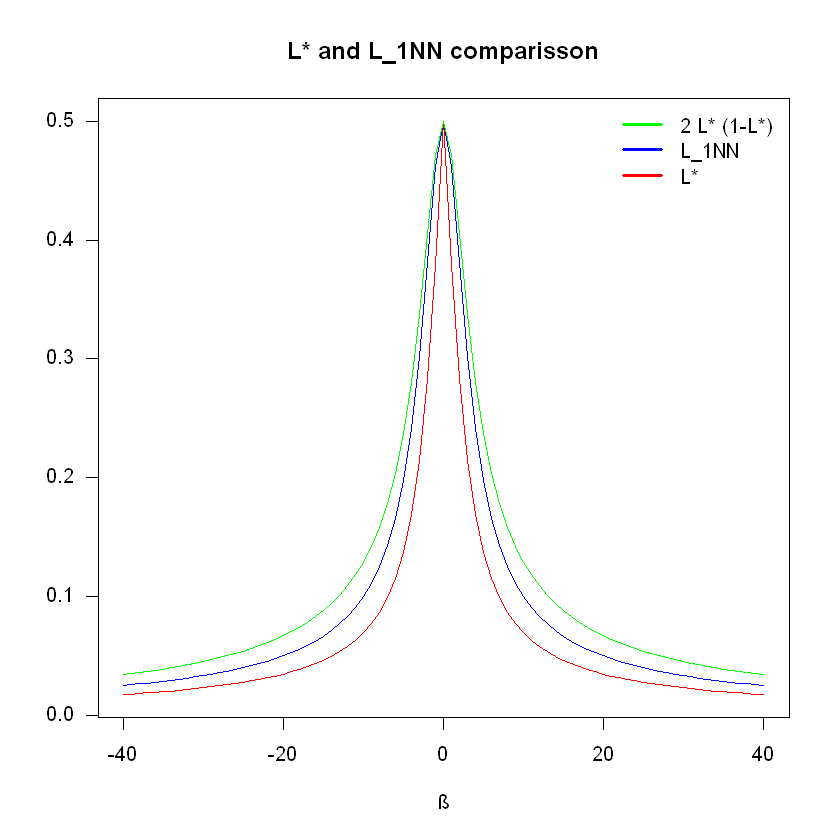

In [17]:
x1 <- (-40:-1)
x2 <- (1:40)
x <- (-40:40)
L_star <- c(1 + 1/x1 * log( (1+exp(-x1))/2 ), 1/2,
            -1/x2 *log( (1+exp(-x2))/2 ))
L_1NN <- c(tanh(x1/2)/x1, 1/2, tanh(x2/2)/x2)
L_star_upper_bound <- 2*L_star*(1-L_star)

plot(x, L_star, type = "l",col="red", main="L* and L_1NN comparisson",
     xlab="β", ylab="", las=1)
lines(x, L_1NN, col="blue")
lines(x, L_star_upper_bound, col="green")

legend("topright",col=c("green", "blue", "red"), legend=c("2 L* (1-L*)", "L_1NN", "L*"),
       lwd=3, bty = "n")

<div class="exercise">
<h1> Ejercicio 6</h1> <a href='#Ejercicio-6' class='anchor-link'>¶</a>

En un experimento descrito en Prentice (1976) se expuso una muestra de escarabajos a cierto pesticida. Tras cinco horas de exposición a distintos niveles de concentración del pesticida algunos de los escarabajos murieron y otros sobrevivieron. Los resultados para cada dosis aparecen en la tabla siguiente: <br>

<style type="text/css">
 padding: 10px;
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Dosis (log10 CS2mgl−1)</th>
    <th class="tg-0lax">N. insectos</th>
    <th class="tg-0lax">N. muertos</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">1.6907</td>
    <td class="tg-0lax">59</td>
    <td class="tg-0lax">6</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.7242</td>
    <td class="tg-0lax">60</td>
    <td class="tg-0lax">13</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.7552</td>
    <td class="tg-0lax">62</td>
    <td class="tg-0lax">18</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.7842</td>
    <td class="tg-0lax">56</td>
    <td class="tg-0lax">28</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.8113</td>
    <td class="tg-0lax">63</td>
    <td class="tg-0lax">52</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.8369</td>
    <td class="tg-0lax">59</td>
    <td class="tg-0lax">53</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.8610</td>
    <td class="tg-0lax">61</td>
    <td class="tg-0lax">62</td>
  </tr>
  <tr>
    <td class="tg-0lax">1.8839</td>
    <td class="tg-0lax">60</td>
    <td class="tg-0lax">60</td>
  </tr>
</tbody>
</table>

Formula un modelo de regresión logística para analizar estos datos y estima la probabilidad de que muera un escarabajo expuesto durante cinco horas a una dosis de concentración $1.8$.
</div>

### Solución

Para predecir la probabilidad de muerte del escarabajo dada la dosis definimos dos variables aleatorias:

- $ Y \equiv$ probabilidad de muerte del escarabajo tras cinco horas.
- $ X \equiv$ Dosis suministrada.

Computaremos la probabilidad de muerte como el cociente del número de muertos entre el número de insectos y utilizaremos un modelo de regresión logística:

$$
    \eta(x) = \mathbb P[Y=1 | X] = f(\beta_0 + x\beta_1) = \frac{1}{1 + e^{-\beta_0 -x \beta_1}}    
$$

Para obtener los valores de $\beta_0$ y $\beta_1$ ajustamos el modelo haciendo uso de la función de `R` `glm()`, que hace referencia a *generalized linear model*. Este modelo genérico incluye a la regresión logística añadiendo `family=quasibinomial` como parámetro. Este valor es equivalente a la familia `binomial` pero utilizando números en coma flotante como entrada en vez de valores entero `0,1`. El modelo no varía pero evitamos un *warning* de R.

En primer lugar, cargamos los datos y computamos el porcentaje de escarabajos muertos que utilizaremos para la predicción.

In [19]:
# Leemos los datos y computamos el porcentaje de escarabajos muertos
escarabajos_df <- read.table('datos/escarabajos.txt', header=TRUE, sep=' ', )
escarabajos_df <- transform(escarabajos_df, porcentaje_muertos = n_muertos / n_insectos)
escarabajos_df

dosis,n_insectos,n_muertos,porcentaje_muertos
<dbl>,<int>,<int>,<dbl>
1.6907,59,6,0.1016949
1.7242,60,13,0.2166667
1.7552,62,18,0.2903226
1.7842,56,28,0.5000000
1.8113,63,52,0.8253968
1.8369,59,53,0.8983051
1.8610,62,61,0.9838710
1.8839,60,60,1.0000000


Ajustamos el modelo de regresión logística.

In [20]:
# Definimos y ajustamos el modelo
reg = glm(porcentaje_muertos~dosis, family=quasibinomial, data=escarabajos_df)
summary(reg)


Call:
glm(formula = porcentaje_muertos ~ dosis, family = quasibinomial, 
    data = escarabajos_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.20933  -0.04659   0.10858   0.16310   0.20807  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -60.459      6.701  -9.023 0.000104 ***
dosis         34.121      3.766   9.059 0.000101 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasibinomial family taken to be 0.02798728)

    Null deviance: 4.71186  on 7  degrees of freedom
Residual deviance: 0.18871  on 6  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


Obteniendo el siguiente modelo final:

$$
    \eta(x) = \mathbb P[Y=1 | X] = \frac{1}{1 + e^{-60.46 -34.12x  }}    
$$

Recordemos que predeciremos que el escarabajo muere si $\eta(x) \ge \frac{1}{2}$. Para realizar nuestra predicción de la probabilidad utilizamos `predict()` con el parámetro `type=response` (en caso de no utilizarlo obtenemos como salida el valor $\eta(x) / (1 - \eta(x))$ en vez de simplemente $\eta(x)$).

In [21]:
datos <- data.frame(dosis = c(1.8))
predict(reg, datos, type = 'response')

1 
0.7229837

Predecimos así una probabilidad del $0.7229$ de que un escarabajo con dosis $1.8$ muera en el trascurso de cinco horas. Finalmente, podemos mostrar una gráfica con nuestro datos y el modelo ajustado obtenido, que como sabemos es una función logística. Pintamos también una línea vertical en el valor a predecir, $1.8$, así como una línea horizontal en la predicción, $0.7229$.

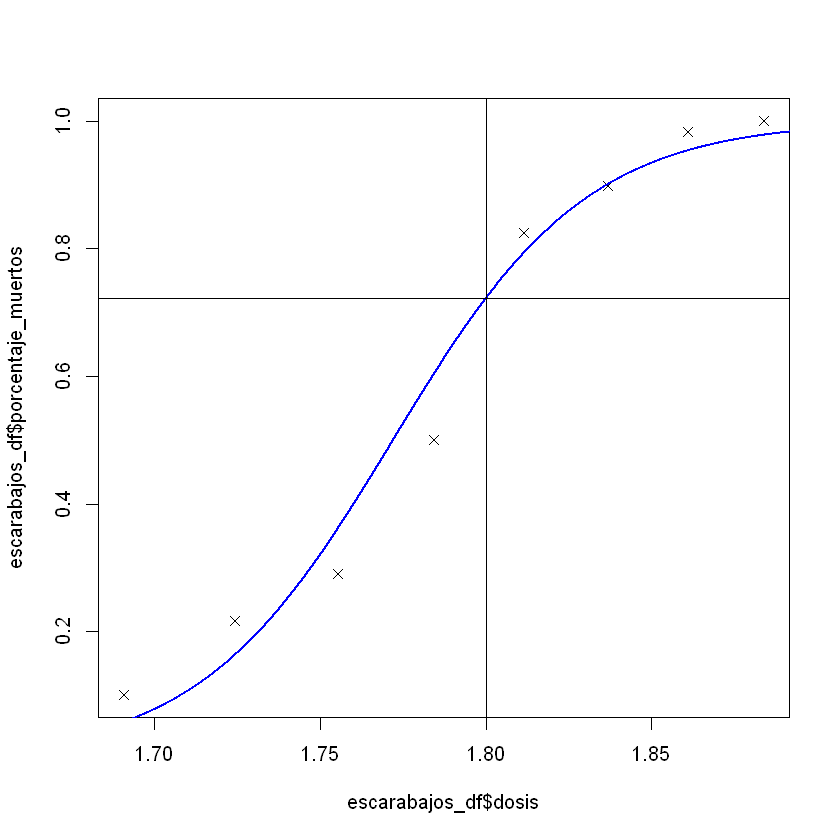

In [22]:
datos <- data.frame(dosis = seq(-1, 2.5, 0.0001))
datos$probs <- predict(reg, datos, type = 'response')
plot(escarabajos_df$dosis, escarabajos_df$porcentaje_muertos, pch=4)
lines(datos$dosis, datos$probs, col = 'blue', lwd = 2)
abline(v=1.8)
abline(h=0.722983749412583)